In [ ]:
# 查看当前kernel下已安装的包  list packages
!pip list --format=columns

In [ ]:
# 安装拓展包
pip install some_package --user

In [ ]:
# 举例：安装sklearn某依赖库
!pip install sklearn2pmml --user

In [8]:
import numpy as np
from matplotlib import pyplot as plt

In [48]:
x = np.array([[3.3],[4.4],[5.5],[6.71],[6.93],[4.168],
            [9.779],[6.182],[7.59],[2.167],[7.042],
            [10.791],[5.313],[7.997],[3.1]],dtype = np.float32)
y = np.array([[1.7],[2.76],[2.09],[3.19],[1.694],[1.573],
            [3.366],[2.596],[2.53],[1.221],[2.827],
            [3.465],[1.65],[2.904],[1.3]],dtype=np.float32)

In [45]:
xav = np.mean(x, axis=0)
print(xav) # axis=0，计算每一列的均值
yav = np.mean(y, axis=0)
print(yav) # axis=0，计算每一列的均值


[6.0646005]
[2.3244002]


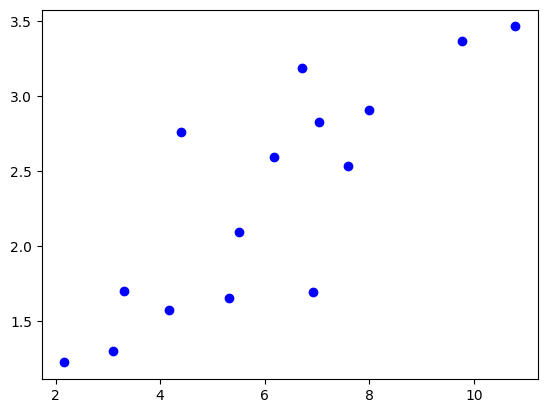

In [38]:
plt.plot(x , y,'bo')

In [39]:
def ols_algebra(x,y):
    '''
    x自变量
    y因变量
    w1线性方程系数
    w0截距
    '''
    n = len(x)
    w1 = (n*sum(x*y)-sum(x)*sum(y))/(n*sum(x*x)-sum(x)*sum(x))
    w0 = (sum(x*x)*sum(y) - sum(x)*sum(x*y)) / (n*sum(x*x)-sum(x)*sum(x))
    return w1, w0

In [40]:
w1,w0 = ols_algebra(x,y)
print(w1)
print(w0)

[0.25998968]
[0.74766755]


In [41]:
def ols_gradient_descent(x,y,lr,num_iter):
    w1 = 2
    w0 = 0
    for i in range(num_iter):
        y_hat = (w1*x) + w0
        w1_gradient = -2 * sum(x*(y-y_hat))
        w0_gradient = -2 * sum(y-y_hat)
        w1 -= lr*w1_gradient
        w0 -= lr*w0_gradient
    return w1,w0

In [42]:
w1_,w0_ = ols_gradient_descent(x,y,0.001,1000)
print(w1_)
print(w0_)

[0.26295054]
[0.7270649]


Text(0.5, 1.0, 'Gradient descent')

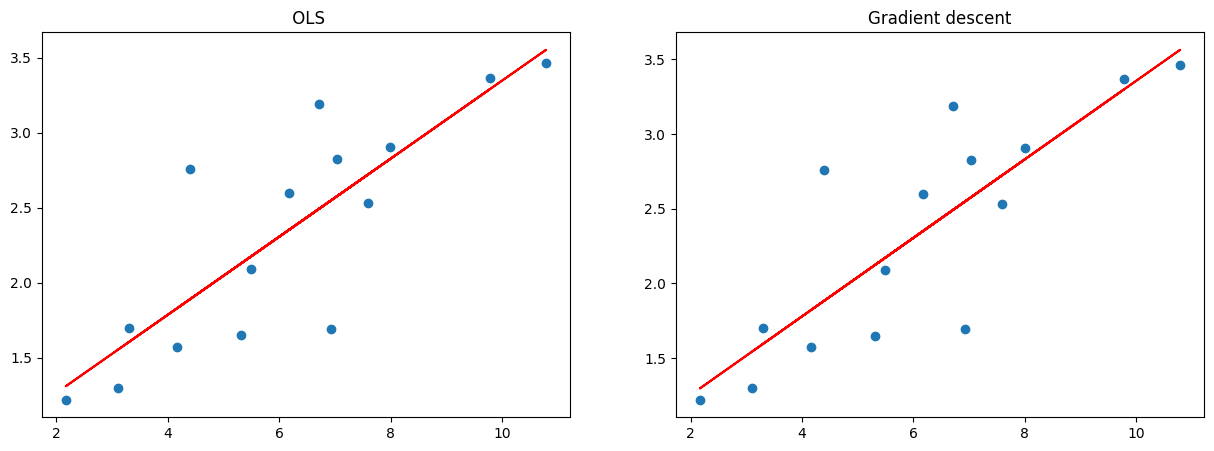

In [47]:
fig, axes = plt.subplots(1, 2,figsize=(15,5))
axes[0].scatter(x, y) 
axes[0].plot(x,x * w1 + w0,'r')
axes[0].set_title(' OLS')
axes[1].scatter(x,y)
axes[1].plot(x,x * w1_+w0_,'r')
axes[1].set_title('Gradient descent')